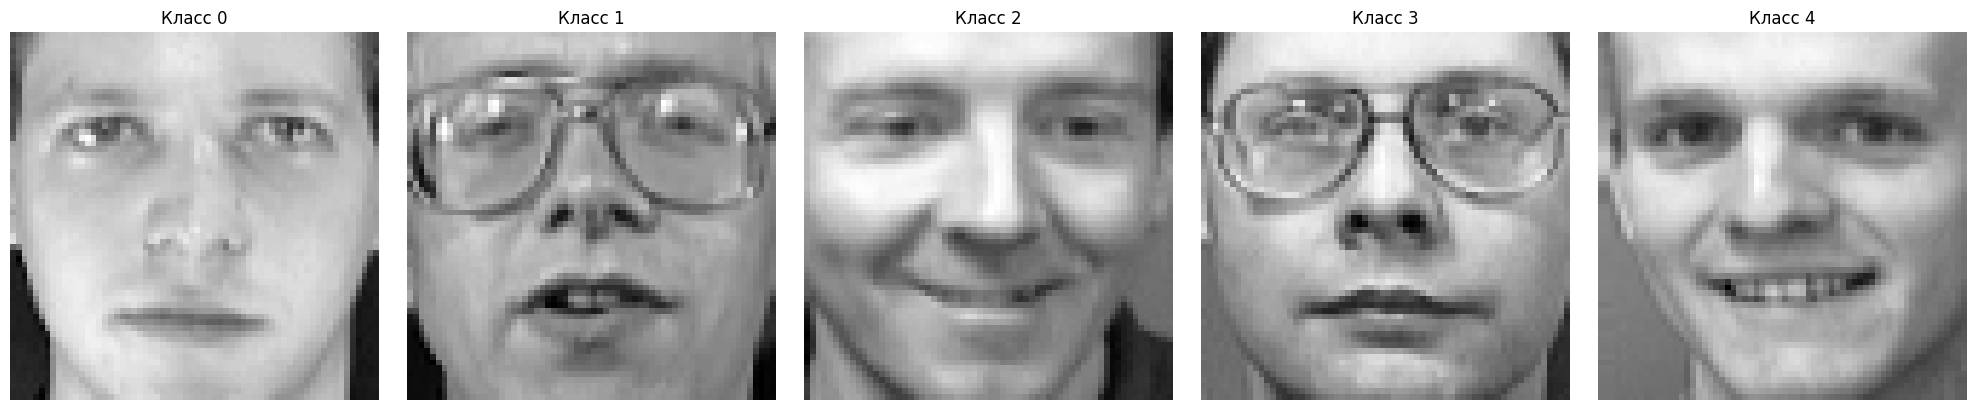

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces

# Загрузка датасета
faces = fetch_olivetti_faces()
images = faces.images  # Изображения размером 64x64
labels = faces.target  # Метки классов (номера людей)

# Отображение первых пяти изображений и их классов
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

for i in range(5):
    image = images[10*i]
    label = labels[10*i]
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f'Класс {label}')
    axes[i].axis('off')

plt.tight_layout()
plt.show();

Задание 1: Классификация лиц из набора данных Olivetti Faces с помощью алгоритмов градиентного бустинга

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.067673 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 304810
[LightGBM] [Info] Number of data points in the train set: 320, number of used features: 4096
[LightGBM] [Info] Start training from score -3.688879
[LightGBM] [Info] Start training from score -3.688879
[LightGBM] [Info] Start training from score -3.688879
[LightGBM] [Info] Start training from score -3.688879
[LightGBM] [Info] Start training from score -3.688879
[LightGBM] [Info] Start training from score -3.688879
[LightGBM] [Info] Start training from score -3.688879
[LightGBM] [Info] Start training from score -3.688879
[LightGBM] [Info] Start training from score -3.688879
[LightGBM] [Info] Start training from score -3.688879
[LightGBM] [Info] Start training from score -3.688879
[LightGBM] [Info] Start training from score -3.688879
[LightGBM] [Info] Start training from score -3.688879
[LightG

C:\Users\Daria\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\Daria\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Daria\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Daria\AppData\Local\Programs\Python\Python313\Lib\site-packa


LightGBM
Accuracy: 0.8375, время обучения: 53.94 сек
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      0.50      0.67         2
           4       0.50      0.50      0.50         2
           5       0.67      1.00      0.80         2
           6       1.00      0.50      0.67         2
           7       0.67      1.00      0.80         2
           8       1.00      0.50      0.67         2
           9       1.00      0.50      0.67         2
          10       1.00      0.50      0.67         2
          11       1.00      1.00      1.00         2
          12       1.00      0.50      0.67         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         2
          16       1.00    

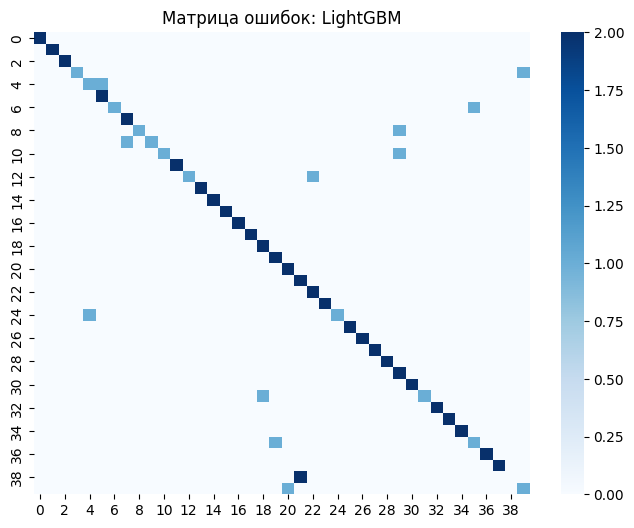


XGBoost
Accuracy: 0.8000, время обучения: 92.87 сек
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       0.67      1.00      0.80         2
           4       1.00      0.50      0.67         2
           5       1.00      1.00      1.00         2
           6       1.00      0.50      0.67         2
           7       0.67      1.00      0.80         2
           8       1.00      0.50      0.67         2
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         2
          11       1.00      1.00      1.00         2
          12       0.33      0.50      0.40         2
          13       0.67      1.00      0.80         2
          14       1.00      1.00      1.00         2
          15       0.67      1.00      0.80         2
          16       1.00     

C:\Users\Daria\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Daria\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Daria\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

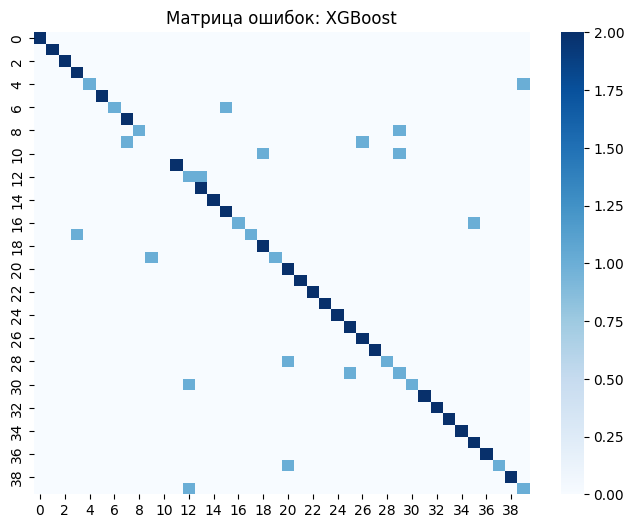


Сравнение точности:
LightGBM: 0.8375
XGBoost: 0.8000


In [2]:
# Здесь должен быть ваш код
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
import time

# Подготовка данных
X = images.reshape(len(images), -1) / 255.0
y = labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

models = {
    "LightGBM": LGBMClassifier(n_estimators=200, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=200, eval_metric='mlogloss', random_state=42),
}

results = {}
for name, model in models.items():
    start = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start

    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name}")
    print(f"Accuracy: {acc:.4f}, время обучения: {train_time:.2f} сек")
    print(classification_report(y_test, y_pred))
    results[name] = acc

    plt.figure(figsize=(8,6))
    sns.heatmap(confusion_matrix(y_test, y_pred), cmap="Blues")
    plt.title(f"Матрица ошибок: {name}")
    plt.show()

print("\nСравнение точности:")
for k, v in results.items():
    print(f"{k}: {v:.4f}")

Задание 2: Классификация лиц из набора Olivetti Faces с помощью ансамбля классификаторов VotingClassifier

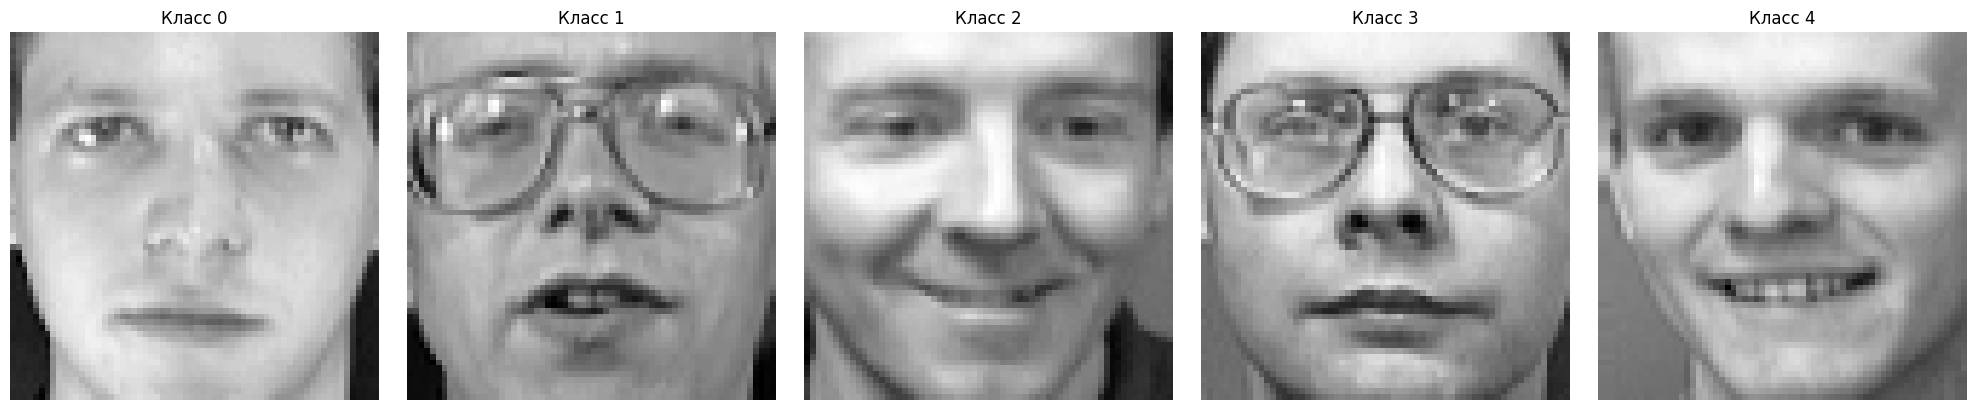

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces

# Загрузка датасета
faces = fetch_olivetti_faces()
images = faces.images  # Изображения размером 64x64
labels = faces.target  # Метки классов (номера людей)

# Отображение первых пяти изображений и их классов
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

for i in range(5):
    image = images[10*i]
    label = labels[10*i]
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f'Класс {label}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [4]:
# Здесь должен быть ваш код
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = images.reshape(len(images), -1) / 255.0
y = labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

clf1 = LogisticRegression(max_iter=1000)
clf2 = DecisionTreeClassifier(max_depth=10)
clf3 = KNeighborsClassifier(n_neighbors=5)
clf4 = GaussianNB()

voting_clf = VotingClassifier(estimators=[
    ('lr', clf1), ('dt', clf2), ('knn', clf3), ('nb', clf4)
], voting='hard')

for name, clf in [('LogisticRegression', clf1), ('DecisionTree', clf2),
                  ('KNN', clf3), ('NaiveBayes', clf4), ('Voting', voting_clf)]:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"\n{name}: accuracy = {accuracy_score(y_test, y_pred):.4f}")


LogisticRegression: accuracy = 0.0250

DecisionTree: accuracy = 0.2250

KNN: accuracy = 0.8500

NaiveBayes: accuracy = 0.8750

Voting: accuracy = 0.2750


Задание 3: Классификация лиц из набора Olivetti Faces с помощью ансамбля классификаторов StackingClassifier


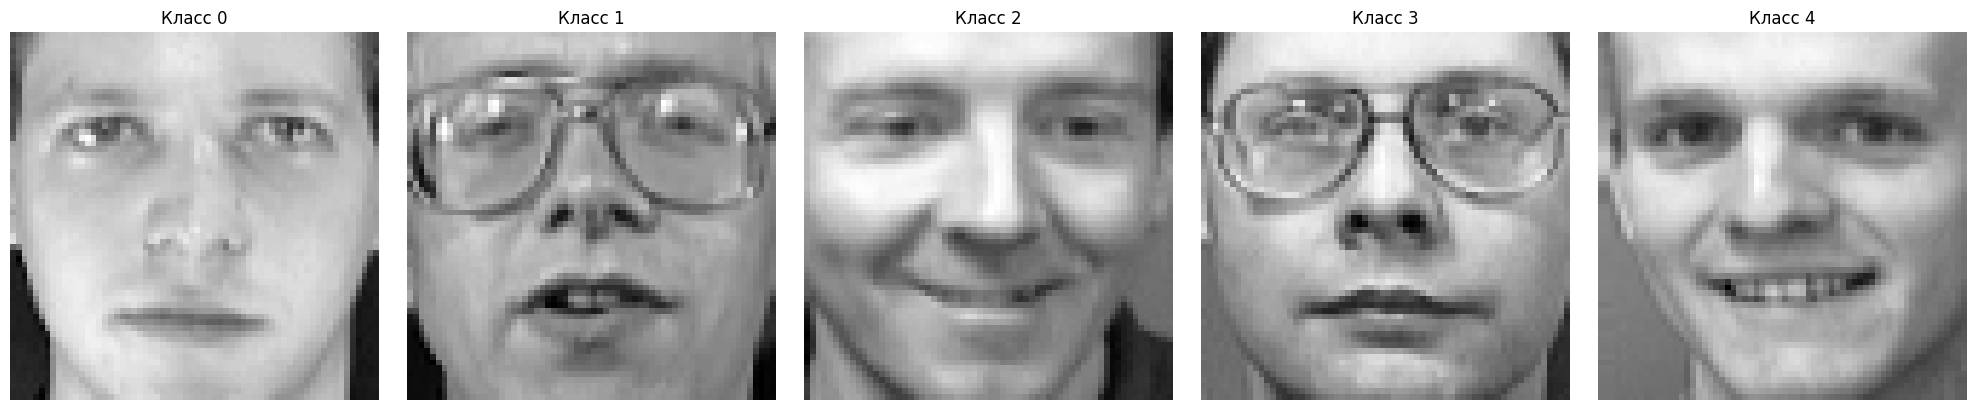

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces

# Загрузка датасета
faces = fetch_olivetti_faces()
images = faces.images  # Изображения размером 64x64
labels = faces.target  # Метки классов (номера людей)

# Отображение первых пяти изображений и их классов
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

for i in range(5):
    image = images[10*i]
    label = labels[10*i]
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f'Класс {label}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()


Модель: Logistic Regression
Accuracy: 0.2800
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.50      0.40         2
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         3
           4       1.00      0.50      0.67         2
           5       0.00      0.00      0.00         3
           6       0.40      1.00      0.57         2
           7       0.00      0.00      0.00         3
           8       0.25      0.50      0.33         2
           9       0.50      0.50      0.50         2
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         2
          13       1.00      1.00      1.00         2
          14       0.00      0.00      0.00         3
          15       0.50      1.00      0.67         2
          16

C:\Users\Daria\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Daria\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Daria\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

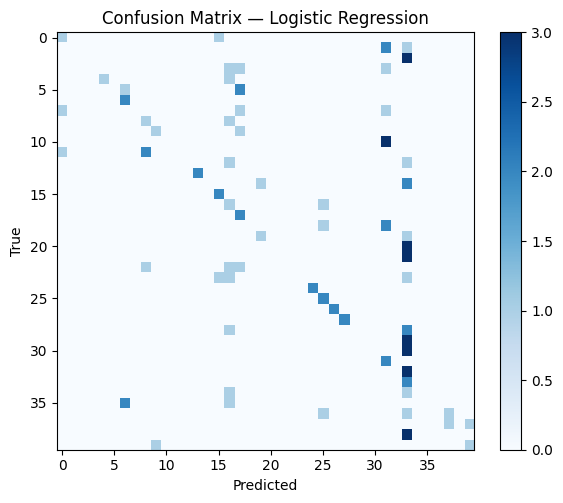


Модель: Decision Tree
Accuracy: 0.6300
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       0.50      0.33      0.40         3
           2       0.50      0.33      0.40         3
           3       0.50      0.33      0.40         3
           4       0.40      1.00      0.57         2
           5       1.00      0.67      0.80         3
           6       0.50      0.50      0.50         2
           7       0.67      0.67      0.67         3
           8       0.67      1.00      0.80         2
           9       0.33      0.50      0.40         2
          10       1.00      0.33      0.50         3
          11       1.00      0.67      0.80         3
          12       0.50      0.50      0.50         2
          13       0.00      0.00      0.00         2
          14       1.00      0.67      0.80         3
          15       0.00      0.00      0.00         2
          16      

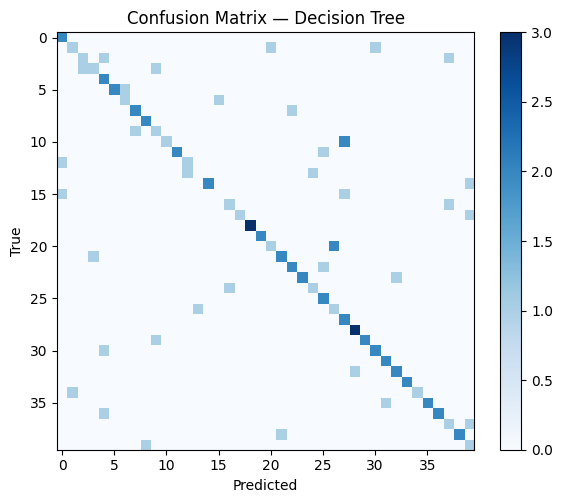


Модель: KNN
Accuracy: 0.8700
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      1.00      1.00         3
           2       1.00      0.33      0.50         3
           3       1.00      0.67      0.80         3
           4       0.67      1.00      0.80         2
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         2
           7       0.75      1.00      0.86         3
           8       1.00      1.00      1.00         2
           9       1.00      0.50      0.67         2
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         3
          15       0.00      0.00      0.00         2
          16       1.00     

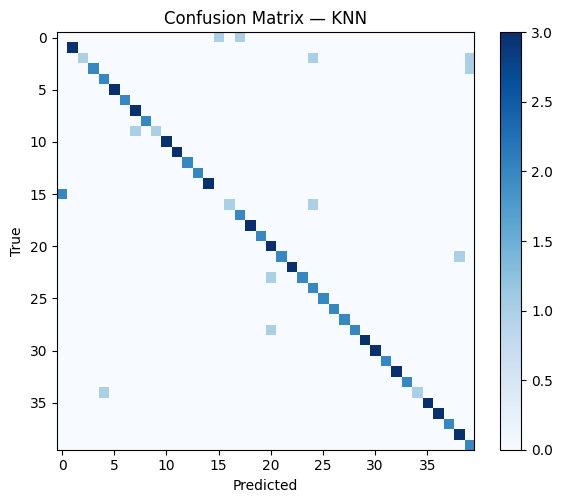


Модель: Gaussian NB
Accuracy: 0.9200
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      0.67      0.80         3
           2       1.00      1.00      1.00         3
           3       1.00      0.67      0.80         3
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         2
           9       1.00      0.50      0.67         2
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       0.67      1.00      0.80         2
          13       1.00      0.50      0.67         2
          14       1.00      1.00      1.00         3
          15       0.50      1.00      0.67         2
          16       1

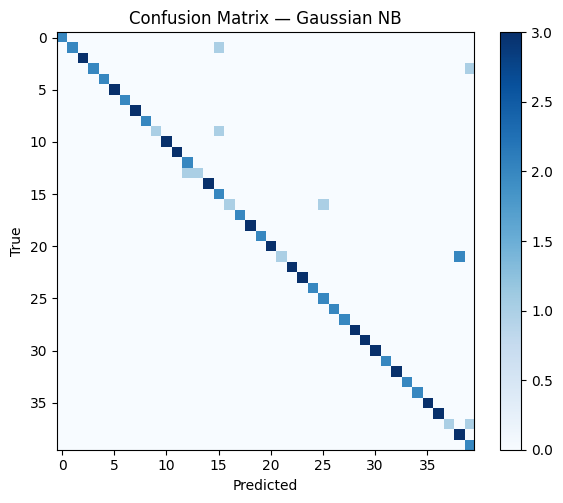


Модель: Stacking Classifier
Accuracy: 0.9400
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      0.67      0.80         3
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         2
           9       1.00      0.50      0.67         2
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       0.67      1.00      0.80         2
          13       1.00      0.50      0.67         2
          14       1.00      1.00      1.00         3
          15       0.67      1.00      0.80         2
          16

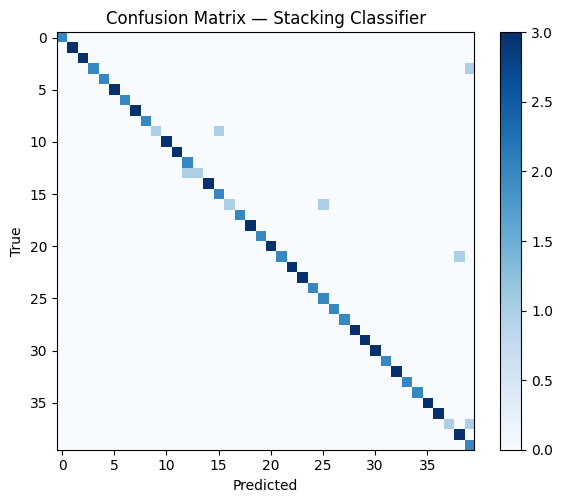

In [9]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier


faces = fetch_olivetti_faces()
X = faces.images
y = faces.target

# Преобразование изображений в векторы
X = X.reshape(X.shape[0], -1)

# Нормализация
X = X / 255.0

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

base_models = [
    ('lr', LogisticRegression(max_iter=5000)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('gnb', GaussianNB())]
meta_model = LogisticRegression(max_iter=5000)
stacking_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5,
    n_jobs=-1)
stacking_clf.fit(X_train, y_train)
models = {
    "Logistic Regression": LogisticRegression(max_iter=5000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Gaussian NB": GaussianNB(),
    "Stacking Classifier": stacking_clf
}

for name, model in models.items():
    if name != "Stacking Classifier":
        model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    print(f"\n{'='*50}")
    print(f"Модель: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    plt.imshow(cm, cmap='Blues')
    plt.title(f"Confusion Matrix — {name}")
    plt.colorbar()
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.show()

